## Important Imports

In [1]:
from pynq import Overlay , allocate
import numpy as np
import matplotlib.pyplot as plt

BITSTREAM = '/home/xilinx/jupyter_notebooks/Lane_PYNQ/design_1.bit'
overlay=Overlay(BITSTREAM)

## Displaying the system blocks

In [2]:
overlay.ip_dict

{'adma': {'type': 'xilinx.com:ip:axi_dma:7.1',
  'mem_id': 'S_AXI_LITE',
  'memtype': 'REGISTER',
  'gpio': {},
  'interrupts': {},
  'parameters': {'C_S_AXI_LITE_ADDR_WIDTH': '10',
   'C_S_AXI_LITE_DATA_WIDTH': '32',
   'C_DLYTMR_RESOLUTION': '125',
   'C_PRMRY_IS_ACLK_ASYNC': '0',
   'C_ENABLE_MULTI_CHANNEL': '0',
   'C_NUM_MM2S_CHANNELS': '1',
   'C_NUM_S2MM_CHANNELS': '1',
   'C_INCLUDE_SG': '0',
   'C_SG_INCLUDE_STSCNTRL_STRM': '0',
   'C_SG_USE_STSAPP_LENGTH': '0',
   'C_SG_LENGTH_WIDTH': '26',
   'C_M_AXI_SG_ADDR_WIDTH': '32',
   'C_M_AXI_SG_DATA_WIDTH': '32',
   'C_M_AXIS_MM2S_CNTRL_TDATA_WIDTH': '32',
   'C_S_AXIS_S2MM_STS_TDATA_WIDTH': '32',
   'C_MICRO_DMA': '0',
   'C_INCLUDE_MM2S': '1',
   'C_INCLUDE_MM2S_SF': '1',
   'C_MM2S_BURST_SIZE': '32',
   'C_M_AXI_MM2S_ADDR_WIDTH': '32',
   'C_M_AXI_MM2S_DATA_WIDTH': '32',
   'C_M_AXIS_MM2S_TDATA_WIDTH': '32',
   'C_INCLUDE_MM2S_DRE': '0',
   'C_INCLUDE_S2MM': '0',
   'C_INCLUDE_S2MM_SF': '1',
   'C_S2MM_BURST_SIZE': '16',
   'C_M

## Creating a DMA Instance

In [3]:
dma = overlay.adma
dma_send = overlay.adma.sendchannel

## Allocating Space in the memory for the image

In [4]:
data_size = 416*416
input_buffer = allocate(shape=(data_size,), dtype=np.uint32)

## Storing the image in the allocated Buffer

In [5]:
with open('/home/xilinx/jupyter_notebooks/Lane_PYNQ/test1_crop.txt', 'r') as f:
    lines = f.readlines()

for i in range(data_size):
    rgb24 = int(lines[i].strip() , 16)  # Get 24-bit RGB value
    # Pack into 32-bit word (upper 8 bits unused)
    input_buffer[i] = rgb24 | 0x00000000  # Explicitly show unused bits
    

## Creating GPIOs Instances

In [6]:
dec_valid = overlay.GPIOs.dec_valid
current_lane=overlay.GPIOs.current_lane
left_bound = overlay.GPIOs.left_bound
no_lanes = overlay.GPIOs.no_lanes
right_bound = overlay.GPIOs.right_bound

##  Code for displaying the image and the outputs

Successfully loaded 173056 pixels
First pixel value (hex): 0x00040203
Last pixel value (hex): 0x00375752


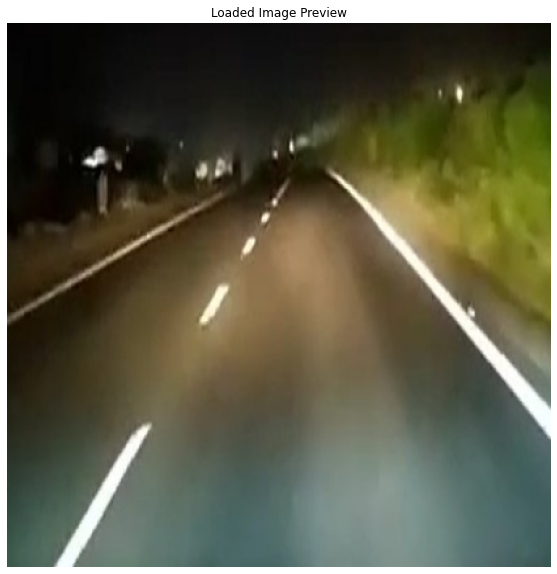

In [7]:
import numpy as np
import matplotlib.pyplot as plt
width = 416
height = 416

image_array = np.zeros((height, width, 3), dtype=np.uint8)  # For display

for i in range(data_size):
    try:
        # Convert hex string to 24-bit RGB
        rgb24 = int(lines[i], 16)
        
        # Store in DMA buffer (32-bit word)
        input_buffer[i] = rgb24
        
        # Also unpack for image display
        y, x = divmod(i, width)
        image_array[y, x] = [
            (rgb24 >> 16) & 0xFF,  # R
            (rgb24 >> 8) & 0xFF,    # G
            rgb24 & 0xFF            # B
        ]
        
    except ValueError:
        raise ValueError(f"Invalid hex at line {i+1}: {lines[i]}")

# 3. Display results
print(f"Successfully loaded {data_size} pixels")
print(f"First pixel value (hex): 0x{input_buffer[0]:08X}")
print(f"Last pixel value (hex): 0x{input_buffer[-1]:08X}")

# Show the image
plt.figure(figsize=(10, 10))
plt.imshow(image_array)
plt.title("Loaded Image Preview")
plt.axis('off')
plt.show()


In [9]:
from pynq.lib import AxiGPIO
dma_send.transfer(input_buffer)
no_lanes.setdirection('in')
no=no_lanes.read()  
cl=current_lane.read()   
lb=left_bound.read()    
rb=right_bound.read()
print(f"Current Lane:{cl} Left Boundary:{lb} Right Boundary :{rb} No_lanes:{no} ")

Current Lane:2 Left Boundary:35 Right Boundary :219 No_lanes:2 
